In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')



In [153]:
hf = pd.read_csv("house.csv")

In [154]:
hf.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [155]:
hf.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [156]:
hf.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [157]:
hf.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Area,2000.0,2786.2095,1295.146799,501.0,1653.00,2833.0,3887.50,4999.0
Bedrooms,2000.0,3.0035,1.424606,1.0,2.00,3.0,4.00,5.0
Bathrooms,2000.0,2.5525,1.108990,1.0,2.00,3.0,4.00,4.0
Floors,2000.0,1.9935,0.809188,1.0,1.00,2.0,3.00,3.0
YearBuilt,2000.0,1961.4460,35.926695,1900.0,1930.00,1961.0,1993.00,2023.0
Price,2000.0,537676.8550,276428.845719,50005.0,300098.00,539254.0,780086.00,999656.0


In [158]:
hf['Price'].value_counts()

Price
959222    2
424998    1
266746    1
244020    1
636056    1
         ..
970200    1
890271    1
663529    1
597685    1
149919    1
Name: count, Length: 1999, dtype: int64

In [159]:
hf['Location'].value_counts()

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

In [160]:
hf.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [161]:
hf.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [162]:
hf.drop('Id',axis=1)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [163]:
average_price = hf["Price"].mean()
print(average_price)

537676.855


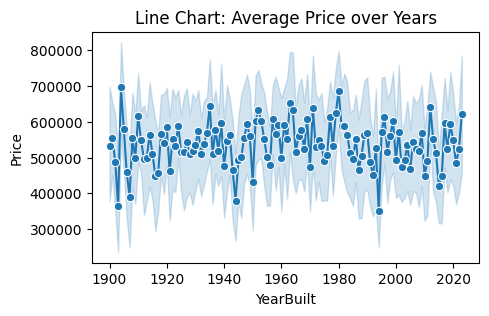

In [164]:
plt.figure(figsize=(5,3))
avg_price_year = hf.groupby('YearBuilt')['Price'].mean().reset_index()
sns.lineplot(hf, x='YearBuilt', y='Price', marker='o')
plt.title('Line Chart: Average Price over Years')
plt.show()


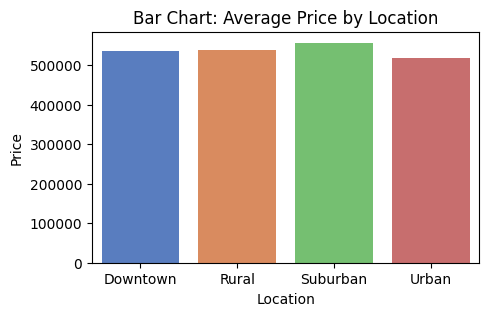

In [165]:
plt.figure(figsize=(5,3))
avg_price_location = hf.groupby('Location')['Price'].mean().reset_index()
sns.barplot(data=avg_price_location, x='Location', y='Price', palette='muted')
plt.title('Bar Chart: Average Price by Location')
plt.show()

Text(0.5, 1.0, 'Scatter Plot: Area vs Price by Bedrooms')

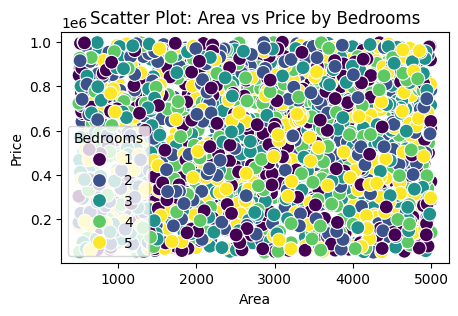

In [166]:
plt.figure(figsize= (5,3))
sns.scatterplot(data=hf, x='Area', y='Price', hue='Bedrooms', palette='viridis', s=100)
plt.title('Scatter Plot: Area vs Price by Bedrooms')

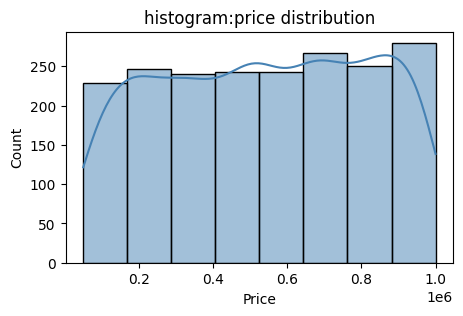

In [167]:
plt.figure(figsize=(5,3))
sns.histplot(hf['Price'],kde=True,color='steelblue',bins=8)
plt.title('histogram:price distribution')
plt.show()

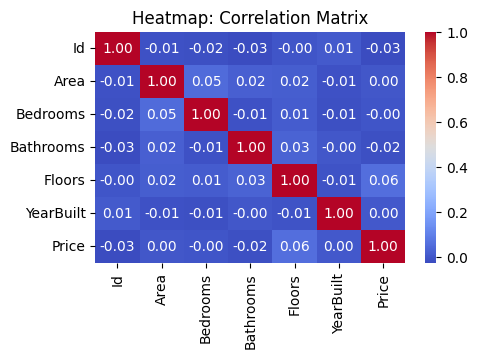

In [168]:
plt.figure(figsize=(5,3))
corr = hf.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Correlation Matrix')
plt.show()

In [169]:
hf.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [170]:
# catagorical coloumns
cat = hf.select_dtypes(include=object).columns
cat

Index(['Location', 'Condition', 'Garage'], dtype='object')

In [171]:
lab_enc= LabelEncoder()
hf['Location']= lab_enc.fit_transform(hf['Location'])

In [172]:
lab_enc= LabelEncoder()
hf['Condition']= lab_enc.fit_transform(hf['Condition'])

In [173]:
lab_enc=LabelEncoder()
hf['Garage']= lab_enc.fit_transform(hf['Garage'])

In [174]:
x = hf.drop(['Id',"Price","Location","YearBuilt"],axis=1)
y = hf['Price']

In [175]:
# normalise
st_scaler= StandardScaler()
scaled_x = st_scaler.fit_transform(x)
scaled_x

array([[-1.10147065,  1.40179052,  1.30556821,  1.24415065, -1.31626723,
        -0.96269532],
       [ 1.14748543,  1.40179052,  1.30556821,  1.24415065, -1.31626723,
        -0.96269532],
       [ 0.62231712, -0.70458141, -0.49832569,  1.24415065,  0.46007181,
        -0.96269532],
       ...,
       [-1.33161794,  1.40179052, -1.40027264,  0.00803475,  1.34824133,
        -0.96269532],
       [ 0.9853011 , -0.00245743, -1.40027264,  0.00803475, -1.31626723,
         1.03875025],
       [ 0.15661639,  1.40179052, -1.40027264,  1.24415065, -0.42809771,
        -0.96269532]], shape=(2000, 6))

In [176]:
# split into traiing and testing

x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.25,random_state=0)

In [177]:
print(x_test.shape,y_test.shape)

(500, 6) (500,)


In [178]:
print(x_train.shape,y_train.shape)

(1500, 6) (1500,)


In [179]:
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [181]:
y_pred = lasso.predict(x_test)

In [182]:
y_pred[:10]

array([538120.27168766, 536672.26200057, 545662.05306308, 528588.99349358,
       557686.65406632, 526055.14523158, 521353.99113941, 534583.06414344,
       528033.61635053, 522658.34214905])

In [183]:
y_test[:10]

405     961656
1190    151096
1132     77603
731     674099
1754    421467
1178    608236
1533    413309
1303    701176
1857    267885
18      989305
Name: Price, dtype: int64

In [184]:
r2_score(y_test,y_pred)

-0.0005811604368404222

In [185]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [186]:
ridge_pred = ridge.predict(x_test)
ridge_pred[:10]

array([538117.61200994, 536671.74625186, 545658.03869996, 528593.18618076,
       557674.84952479, 526061.22101021, 521360.68861925, 534584.85684055,
       528039.34884257, 522664.82664128])

In [187]:
r2_score(ridge_pred,y_test)

-264.42056361367827

In [188]:
ridge.score(x_train,y_train)

0.0036549788144371043

In [189]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10)
forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [190]:
forest_pred = forest.predict(x_test)
forest_pred

array([709915.3 , 611283.8 , 467602.6 , 410367.2 , 643525.2 , 470659.2 ,
       515340.6 , 582258.5 , 657774.6 , 439856.5 , 632812.1 , 763455.  ,
       485108.6 , 402031.8 , 721333.9 , 557138.5 , 559663.8 , 495140.3 ,
       610015.  , 605733.8 , 633254.4 , 684031.5 , 503454.2 , 522756.8 ,
       512520.8 , 432951.9 , 468905.7 , 448642.2 , 327301.8 , 473898.  ,
       591821.5 , 487126.9 , 601008.5 , 484059.9 , 392154.5 , 325081.5 ,
       500101.3 , 562771.2 , 582573.9 , 651742.3 , 719073.3 , 452294.9 ,
       687284.4 , 617010.8 , 494511.6 , 576854.8 , 487562.4 , 591516.1 ,
       521816.9 , 615121.3 , 352050.7 , 683146.2 , 482415.8 , 605347.8 ,
       454158.3 , 810553.7 , 681768.9 , 575327.2 , 407994.2 , 492088.2 ,
       466581.8 , 460517.6 , 574248.8 , 560763.9 , 494537.1 , 837713.9 ,
       628911.4 , 479841.3 , 665392.1 , 484940.  , 628216.1 , 416998.2 ,
       414216.1 , 610817.3 , 603296.7 , 533623.7 , 587483.8 , 366518.  ,
       656481.2 , 552030.9 , 486541.  , 749050.9 , 

In [191]:
r2_score(forest_pred,y_test)

-4.494972041784871

In [ ]:
lab_enc = LabelEncoder()
hf['Location']= lab_enc.fit_transform(hf['Location'])

In [ ]:
uni=hf['Condition'].value_counts()
print(uni)

Condition
1    521
0    511
3    507
2    461
Name: count, dtype: int64


In [ ]:
hf.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056


In [ ]:
hf

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,2,3,0,295620
1996,1997,3046,5,2,1,2019,2,3,1,580929
1997,1998,1062,5,1,2,1903,1,3,0,476925
1998,1999,4062,3,1,2,1936,3,0,1,161119


In [ ]:
hf

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,2,3,0,295620
1996,1997,3046,5,2,1,2019,2,3,1,580929
1997,1998,1062,5,1,2,1903,1,3,0,476925
1998,1999,4062,3,1,2,1936,3,0,1,161119


In [ ]:
x= hf.iloc[:,:-1]
y= hf.iloc[:,-1]

split into training and testing 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [ ]:
hf

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,2,3,0,295620
1996,1997,3046,5,2,1,2019,2,3,1,580929
1997,1998,1062,5,1,2,1903,1,3,0,476925
1998,1999,4062,3,1,2,1936,3,0,1,161119


In [ ]:
x_test.shape,x_train.shape

((600, 8), (1400, 8))

In [ ]:
y_test.shape,y_train.shape

((600,), (1400,))

data normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()


x_train_scaled = min_max_scaler.fit_transform(x_train)


x_test_scaled = min_max_scaler.transform(x_test)


model building

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)



LinearRegression()

In [ ]:
y_pred  = lin_model.predict(x_test)
y_pred

array([516008.696411  , 529868.81818335, 532667.99792819, 558842.90734054,
       575403.03238252, 532775.44544037, 503950.43722502, 520157.33490624,
       526656.80272945, 546506.18892529, 531286.8029073 , 546790.01501833,
       529344.44261452, 549363.96655559, 506302.05474338, 523859.19074052,
       541940.72955376, 490995.84087599, 522086.35312909, 525600.60877917,
       496659.08986953, 546555.69141838, 502735.75790443, 553978.13218313,
       566748.75414686, 569295.95980919, 543394.98407454, 557417.54156256,
       528290.1472755 , 547428.33595206, 545633.92034214, 541340.90285028,
       544227.89628005, 502191.18263495, 561172.17575001, 527111.40925678,
       508781.59963935, 568436.19930194, 515952.28053961, 568433.7674503 ,
       569794.80956099, 579719.76954455, 515893.44401578, 513701.84839588,
       549343.6433778 , 540104.50689929, 515851.44239832, 499806.15695297,
       558276.96238659, 555823.96523608, 554415.8110108 , 529653.27919389,
       580197.03308403, 5

In [ ]:
y_test

1053    697659
1206    121540
1711    325536
1395    332902
126     345107
         ...  
1313    346280
802     198940
1302    965885
915     503035
1563    944370
Name: Price, Length: 600, dtype: int64

In [ ]:
# check the model accuracy 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

-1.4619065757280447

In [ ]:
# training accuracy
lin_model.score(x_train,y_train)

0.007797907297891538

In [ ]:
# testing accuracy
lin_model.score(x_test,y_test)

-0.014619065757280447